# TEST

Notebook environment to migrate netcdf files to CF compliant zarr

In [1]:
# Optional; code formatter, installed as jupyter lab extension
#%load_ext lab_black
# Optional; code formatter, installed as jupyter notebook extension
%load_ext nb_black

<IPython.core.display.Javascript object>

### Configure OS independent paths

In [4]:
# Import standard packages
import os
import pathlib
import sys
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# Make root directories importable by appending root to path
cwd = pathlib.Path().resolve()
sys.path.append(os.path.dirname(cwd))

# Get root paths
home = pathlib.Path().home()
root = home.root

# Import custom functionality
from coclicodata.drive_config import p_drive
from coclicodata.etl.cf_compliancy_checker import check_compliancy, save_compliancy

# Define (local and) remote drives
coclico_data_dir = p_drive.joinpath("11207608-coclico", "FULLTRACK_DATA")

# Workaround to the Windows OS (10) udunits error after installation of cfchecker: https://github.com/SciTools/iris/issues/404
os.environ["UDUNITS2_XML_PATH"] = str(
    pathlib.Path().home().joinpath(  # change to the udunits2.xml file dir in your Python installation
        r"Anaconda3\pkgs\udunits2-2.2.28-h892ecd3_0\Library\share\udunits\udunits2.xml"
    )
)

<IPython.core.display.Javascript object>

In [14]:
# Project paths & files (manual input)
dataset_dir = coclico_data_dir.joinpath("WP4", "data")
dataset = dataset_dir.joinpath("CTP_ReturnPeriods.nc")
CF_dir = coclico_data_dir.joinpath(r"CF")  # directory to save output CF check files

<IPython.core.display.Javascript object>

In [18]:
CF_dir

WindowsPath('P:/11207608-coclico/FULLTRACK_DATA/CF')

<IPython.core.display.Javascript object>

### Check CF compliancy original NetCDF files

In [7]:
# open datasets
dataset = xr.open_dataset(dataset)

# check original dataset
dataset

<xarray.Dataset>
Dimensions:  (lon: 51010, lat: 51010)
Coordinates:
  * lon      (lon) float64 -5.28 -5.269 -5.315 -5.303 ... 14.57 14.57 14.58
  * lat      (lat) float64 35.69 35.69 35.69 35.69 ... 35.84 35.87 35.85 35.86
Data variables:
    RP1      (lon) float64 ...
    RP100    (lon) float64 ...
    RP1000   (lon) float64 ...
Attributes:
    title:         EU Coastal Target Points - TWL Return Periods
    summary:       Location of Coastal Target Points and their respective TWL...
    institution:   Universidad de Cantabria, Instituto de Hidráulica Ambienta...
    keywords:      extreme event, hindcast, EU scale
    date_created:  14th of February 2024
    project:       CoCliCo - Coastal Climate Core Services
    coventions:    CF conventions 1.3

<IPython.core.display.Javascript object>

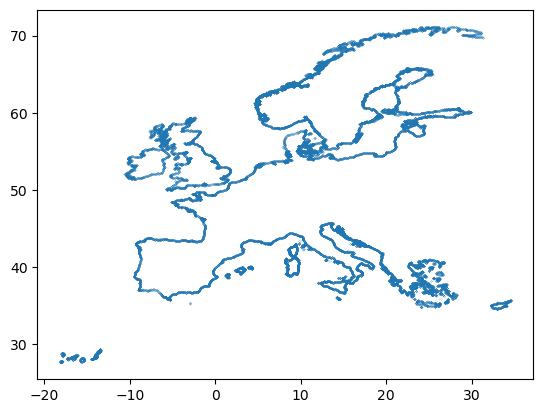

<IPython.core.display.Javascript object>

In [12]:
# plot the data points lon lat
plt.plot(dataset.lon, dataset.lat, "o", markersize=0.1)

In [16]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=dataset, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [17]:
# save original CF compliancy
save_compliancy(cap, testfile=dataset, working_dir=CF_dir)

{'P:\\11207608-coclico\\FULLTRACK_DATA\\WP4\\data\\CTP_ReturnPeriods.nc': {'warnings': '1', 'errors': '5'}}


<IPython.core.display.Javascript object>

In [ ]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=dataset_rcp45_path, working_dir=CF_dir)

In [ ]:
# save original CF compliancy
save_compliancy(cap, testfile=dataset_rcp45_path, working_dir=CF_dir)

In [ ]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=dataset_rcp85_path, working_dir=CF_dir)

In [ ]:
# save original CF compliancy
save_compliancy(cap, testfile=dataset_rcp85_path, working_dir=CF_dir)

### Make CF compliant alterations to the NetCDF files (dataset dependent)

In [ ]:
# NetCDF attribute alterations

# rename global attribute names
dataset_historical.attrs["Project_Name"] = dataset_historical.attrs.pop("Project Name")
dataset_historical.attrs["Project_Acronym"] = dataset_historical.attrs.pop(
    "Project Acronym"
)
dataset_45rcp.attrs["Project_Name"] = dataset_45rcp.attrs.pop("Project Name")
dataset_45rcp.attrs["Project_Acronym"] = dataset_45rcp.attrs.pop("Project Acronym")
dataset_85rcp.attrs["Project_Name"] = dataset_85rcp.attrs.pop("Project Name")
dataset_85rcp.attrs["Project_Acronym"] = dataset_85rcp.attrs.pop("Project Acronym")

# add global attributes
dataset_historical.attrs["Conventions"] = "CF-1.8"
dataset_45rcp.attrs["Conventions"] = "CF-1.8"
dataset_85rcp.attrs["Conventions"] = "CF-1.8"
dataset_historical.attrs["Starting_date"] = "01-Dec-1969"
dataset_historical.attrs["End_date"] = "30-Nov-2004 21:00:00"
dataset_45rcp.attrs["Starting_date"] = "01-Dec-2009"
dataset_45rcp.attrs["End_date"] = "30-Nov-2099 21:00:00"
dataset_85rcp.attrs["Starting_date"] = "01-Dec-2009"
dataset_85rcp.attrs["End_date"] = "30-Nov-2099 21:00:00"

# remove certain variable attributes
del dataset_historical["RP"].attrs["Starting date"]
del dataset_historical["RP"].attrs["End date"]
del dataset_45rcp["RP"].attrs["Starting date"]
del dataset_45rcp["RP"].attrs["End date"]
del dataset_85rcp["RP"].attrs["Starting date"]
del dataset_85rcp["RP"].attrs["End date"]

In [ ]:
# NetCDF variable and dimension alterations

# rename or swap dimension names, the latter in case the name already exists as coordinate
dataset_historical = dataset_historical.rename_dims({"row": "stations"})
dataset_45rcp = dataset_45rcp.rename_dims({"row": "stations"})
dataset_85rcp = dataset_85rcp.rename_dims({"row": "stations"})
dataset_historical = dataset_historical.swap_dims({"col": "rp"})
dataset_45rcp = dataset_45rcp.swap_dims({"col": "rp"})
dataset_85rcp = dataset_85rcp.swap_dims({"col": "rp"})

# rename variables, if necessary
dataset_historical = dataset_historical.rename_vars(
    {"RP": "rp", "longitude": "lon", "latitude": "lat"}
)
dataset_45rcp = dataset_45rcp.rename_vars(
    {"RP": "rp", "longitude": "lon", "latitude": "lat"}
)
dataset_85rcp = dataset_85rcp.rename_vars(
    {"RP": "rp", "longitude": "lon", "latitude": "lat"}
)

# set some data variables to coordinates to avoid duplication of dimensions in later stage
dataset_historical = dataset_historical.set_coords(["lon", "lat", "rp"])
dataset_45rcp = dataset_45rcp.set_coords(["lon", "lat", "rp"])
dataset_85rcp = dataset_85rcp.set_coords(["lon", "lat", "rp"])

In [ ]:
# concat datasets along new dimension with index values and name derived from pandas index object, if necessary
dataset = xr.concat(
    [dataset_historical, dataset_45rcp, dataset_85rcp], dim="nscenarios",
)
dataset = dataset.assign_coords(
    scenarios=("nscenarios", np.array(["Historical", "RCP45", "RCP85"], dtype="S"))
)

# dataset = xr.concat(
#     [dataset_historical, dataset_45rcp, dataset_85rcp],
#     pd.Index(["historical", "rcp45", "rcp85"], name="scenarios"),
# )

# dataset["scenarios"].values.astype("U") # retrieve scenarios as string

In [ ]:
# re-order shape of the data variables
dataset_historical = dataset_historical.transpose("stations", "rp")
dataset_45rcp = dataset_45rcp.transpose("stations", "rp")
dataset_85rcp = dataset_85rcp.transpose("stations", "rp")
dataset = dataset.transpose("nscenarios", "stations", "rp")

# add or change certain variable / coordinate attributes
dataset_attributes = {
    "scenarios": {"long_name": "climate scenarios"}
}  # specify custom (CF convention) attributes

# add / overwrite attributes
for k, v in dataset_attributes.items():
    try:
        dataset[k].attrs = dataset_attributes[k]
    except:
        continue

# add epsg
dataset_historical.attrs["crs"] = 4326
dataset_45rcp.attrs["crs"] = 4326
dataset_85rcp.attrs["crs"] = 4326
dataset.attrs["crs"] = 4326

In [ ]:
# check the xarray dataset, best practice is to have as many as possible bold dimensions (dimension == coordinate name).
# in this way, the Front-End can access the variable directly without having to index the variable first

dataset
# dataset["scenarios"]

In [ ]:
# save new .nc files
dataset_historical.to_netcdf(path=str(dataset_historical_path).replace(".nc", "_CF.nc"))
dataset_45rcp.to_netcdf(path=str(dataset_rcp45_path).replace(".nc", "_CF.nc"))
dataset_85rcp.to_netcdf(path=str(dataset_rcp85_path).replace(".nc", "_CF.nc"))
dataset.to_netcdf(path=dataset_dir.joinpath(dataset_out_file + "_CF.nc"))

### Check CF compliancy altered NetCDF files

In [ ]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(dataset_historical_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

In [ ]:
# save altered CF compliancy
save_compliancy(
    cap,
    testfile=str(dataset_historical_path).replace(".nc", "_CF.nc"),
    working_dir=CF_dir,
)

In [ ]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(dataset_rcp45_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

In [ ]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=str(dataset_rcp45_path).replace(".nc", "_CF.nc"), working_dir=CF_dir,
)

In [ ]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(dataset_rcp85_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

In [ ]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=str(dataset_rcp85_path).replace(".nc", "_CF.nc"), working_dir=CF_dir,
)

In [ ]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=dataset_dir.joinpath(dataset_out_file + "_CF.nc"), working_dir=CF_dir)

In [ ]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=dataset_dir.joinpath(dataset_out_file + "_CF.nc"), working_dir=CF_dir,
)

### write data to Zarr files

In [ ]:
# export to zarr in write mode (to overwrite if exists)
dataset.to_zarr(dataset_dir.joinpath("%s.zarr" % dataset_out_file), mode="w")